<a href="https://colab.research.google.com/github/babaanalog/LSTM_Projects/blob/main/Assignment_Moazzam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M. Moazzam Ali Ashraf

mmoazzamaliashraf@gmail.com


Registration No: 	AI 10


Class: Artificial Intelligence (Deep Learning & Computer Vision focused)

Secion: Deep Learning for AI Live 10





---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 111.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 57.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensor

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [ ]:
import keras as keras
print(keras.__version__)

2.9.0


In [ ]:
# Import libraries
#!pip install opencv-python
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow

from keras import backend as K
#K.set_image_dim_ordering('th')
K.set_image_data_format('channels_last')
#from keras.layers import Merge
from keras.layers import Concatenate
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import glob

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [ ]:
 ! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs mmio_stale_data retbleed
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtua

# Data Reading and Labeling

In [ ]:
PATH = os.getcwd()
# Define data path
data_path = '/content/drive/MyDrive/DICE_AI_Live_02/Assignment/Publication_Dataset'

data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=2
no_images=0

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    no_images = no_images+len(img_list)

# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
num_classes = 3
label_index=0
img_data_list=[]
img=0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        if dataset[0]==  'A':
            labels[label_index]=  0
            #print(dataset[0])
        if dataset[0] == 'D':
            labels[label_index] = 1
            #print(dataset[0])
        if dataset[0] == 'N':
            labels[label_index] = 2
        label_index = label_index+1
            #print(dataset[0])


Loaded the images of dataset-AMD15

Loaded the images of dataset-AMD3

Loaded the images of dataset-DME10

Loaded the images of dataset-AMD13

Loaded the images of dataset-AMD8

Loaded the images of dataset-AMD4

Loaded the images of dataset-AMD5

Loaded the images of dataset-AMD12

Loaded the images of dataset-AMD6

Loaded the images of dataset-DME8

Loaded the images of dataset-DME11

Loaded the images of dataset-DME12

Loaded the images of dataset-AMD2

Loaded the images of dataset-AMD10

Loaded the images of dataset-AMD11

Loaded the images of dataset-DME9

Loaded the images of dataset-AMD9

Loaded the images of dataset-AMD14

Loaded the images of dataset-DME14

Loaded the images of dataset-AMD7

Loaded the images of dataset-NORMAL1

Loaded the images of dataset-DME5

Loaded the images of dataset-DME1

Loaded the images of dataset-DME4

Loaded the images of dataset-DME15

Loaded the images of dataset-DME2

Loaded the images of dataset-NORMAL11

Loaded the images of dataset-NORMAL10

# Preprocessing steps

In [ ]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)


# Using 'th' for the image_dim_ordering we get accuracy >=0.99 .
# Using 'tf' for the dim order I get accuracy >= 0.9 but on more epochs
if num_channel==1:
    if K.image_data_format()=='channels_first':
        img_data= np.expand_dims(img_data, axis=1)
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3)
        print (img_data.shape)

else:
    if K.image_data_format()=='channels_first':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)


        labels[0:722] = 0
        labels[723:1823] = 1
        labels[1824:3231] = 2


        X_train.shape


(3231, 128, 128)
(3231, 128, 128, 1)


In [ ]:
# Assigning Labels

# Define the number of classes
num_classes = 3

names = ['AMD','DME','NORMAL']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
#print(Y)
#Shuffle the dataset with random state=2
x,y = shuffle(img_data, Y,random_state=2)
#print(y)
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=20)
#print(y_test)
X_train.shape

(2584, 128, 128, 1)

In [ ]:
X_train.shape,y_train.shape,             X_test.shape,y_test.shape

((2584, 128, 128, 1), (2584, 3), (647, 128, 128, 1), (647, 3))

In [ ]:
y_train[0]

array([0., 0., 1.], dtype=float32)

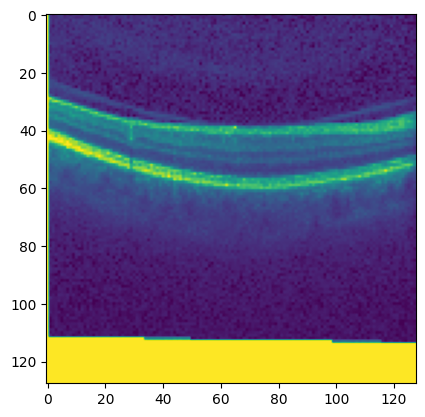

In [ ]:
plt.imshow(X_train[0])

# Reshaping Data

## shape of all data

In [ ]:
x_train_flatten = X_train.reshape(X_train.shape[0],-1)

In [ ]:
x_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [ ]:
x_train_flatten.shape, x_test_flatten.shape

((2584, 16384), (647, 16384))

# Solve using ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

%matplotlib inline
np.random.seed(1)


In [ ]:
model = Sequential()

model.add(Dense(15, activation='tanh', input_dim=x_train_flatten.shape[1])) #, init='normal'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
x_train_flatten.shape[1]

16384

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                245775    
                                                                 
 dense_10 (Dense)            (None, 20)                320       
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 3)                 18        
                                                                 
Total params: 246,378
Trainable params: 246,378
Non-trainable params: 0
_________________________________________________________________


## Model Compiling

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training

In [ ]:
history = model.fit(x_train_flatten, y_train, epochs= 10, verbose = 1)

Epoch 1/10
81/81 [==============================] - 1s 6ms/step - loss: 0.5693 - accuracy: 0.6064
Epoch 2/10
81/81 [==============================] - 0s 6ms/step - loss: 0.5206 - accuracy: 0.7105
Epoch 3/10
81/81 [==============================] - 0s 6ms/step - loss: 0.4859 - accuracy: 0.7705
Epoch 4/10
81/81 [==============================] - 0s 6ms/step - loss: 0.4551 - accuracy: 0.7976
Epoch 5/10
81/81 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.8301
Epoch 6/10
81/81 [==============================] - 0s 4ms/step - loss: 0.4002 - accuracy: 0.8518
Epoch 7/10
81/81 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8746
Epoch 8/10
81/81 [==============================] - 0s 4ms/step - loss: 0.3439 - accuracy: 0.9060
Epoch 9/10
81/81 [==============================] - 0s 4ms/step - loss: 0.3192 - accuracy: 0.9149
Epoch 10/10
81/81 [==============================] - 0s 4ms/step - loss: 0.2946 - accuracy: 0.9307


## Check The Confusion Matrix for the ANN

21/21 [==============================] - 0s 3ms/step
[[0.164 0.161 0.863]
 [0.179 0.156 0.87 ]
 [0.432 0.255 0.242]
 ...
 [0.178 0.178 0.834]
 [0.166 0.161 0.859]
 [0.165 0.184 0.83 ]]
[2 2 0 2 2 2 0 1 0 2 1 2 1 1 0 2 0 1 1 1 1 2 1 0 2 2 0 2 2 2 1 0 2 2 2 2 2
 1 2 2 2 2 1 2 0 1 2 2 1 1 2 1 2 1 2 1 2 2 2 2 1 1 2 0 2 1 2 2 1 2 2 0 1 1
 0 1 0 0 1 2 2 1 2 2 1 1 0 2 0 1 1 0 0 2 2 2 0 1 2 1 2 2 0 2 1 0 0 1 2 2 1
 2 1 1 2 1 2 2 1 1 2 2 0 2 1 2 1 2 2 1 1 2 2 0 0 1 1 2 1 2 1 2 2 1 2 1 1 1
 2 1 2 1 2 1 1 2 2 1 2 1 0 1 2 1 2 2 1 2 2 1 1 1 2 1 2 2 1 2 0 2 1 2 0 0 1
 2 1 1 2 2 2 0 1 1 1 0 2 1 2 2 2 2 2 0 2 2 0 2 1 2 2 2 0 2 1 1 2 1 2 2 2 2
 1 2 1 2 1 1 0 1 1 2 1 2 0 1 1 1 2 1 2 2 2 1 1 0 0 1 1 2 2 1 2 1 2 2 2 1 1
 2 1 2 2 2 2 2 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 1 1 1 2 2 1 2 0 1 1 2 1 2 2 2
 2 2 2 0 1 2 2 1 0 2 2 0 0 2 0 2 0 1 0 1 1 0 1 2 2 1 2 1 1 0 2 0 1 1 1 1 1
 2 1 2 1 0 1 1 1 1 0 2 2 1 2 2 1 1 2 1 1 1 2 1 1 1 0 2 2 1 2 2 2 1 2 1 1 2
 2 2 2 1 2 2 1 0 1 2 2 1 1 0 2 2 0 2 1 1 1 2 1 2 2 1 2 1 2 1 1 2 

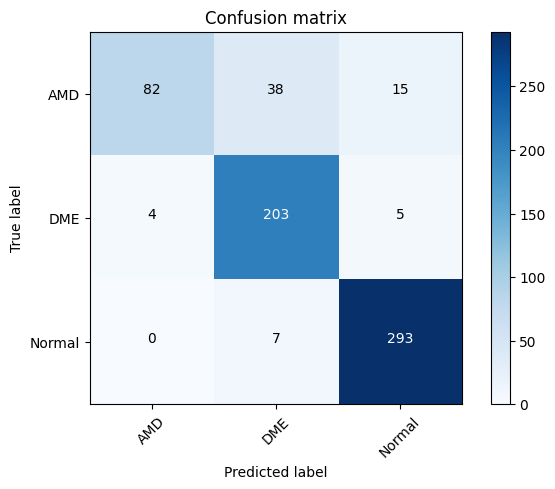

In [ ]:
# Predict model on Test Data

Y_pred = model.predict(x_test_flatten)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred =  np.argmax(Y_pred, axis=1)
print(y_pred)

target_names = ['AMD', 'DME', 'Normal']

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

## Check The Classification report for the ANN

In [ ]:
from sklearn.metrics import classification_report
#reversing one hot encoding
a = np.array(y_test)
import pandas as pd
df= pd.DataFrame({"0":a[:,0],"1":a[:,1],"2":a[:,2]})
#print(df)
#print(a)
df['tags']=''
for col_name in df.columns:
    df.loc[df[col_name]==1,'tags']= df['tags']+' '+col_name


df['tags'] = df['tags'].astype(int)
#print(df['tags'].dtype)
#print(y_pred.dtype)
print(classification_report(df['tags'], y_pred, target_names=target_names))

              precision    recall  f1-score   support

         AMD       0.95      0.61      0.74       135
         DME       0.82      0.96      0.88       212
      Normal       0.94      0.98      0.96       300

    accuracy                           0.89       647
   macro avg       0.90      0.85      0.86       647
weighted avg       0.90      0.89      0.89       647



In [ ]:
results = model.evaluate(x_test_flatten, y_test)

21/21 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.8934


# Solve using CNN

## CNN - Modeling

X_train.shape,y_train.shape, ❤ X_test.shape,y_test.shape

In [ ]:
# Utility function
def evaluate_this_model(model, epochs):

    np.random.seed(1)

    history = model.fit(X_train, y_train,epochs=epochs)
    results = model.evaluate(X_test, y_test)

    plt.plot(np.squeeze(history.history["loss"]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
    print("\nAccuracy on test set is {}".format(results[1]))

### CNN - Model Architecture

In [ ]:
#setting seed values of all libraries to ensure reproducibility
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value-1)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value+1)
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value+2)
from keras import backend as K

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)

tf.compat.v1.keras.backend.set_session(sess)

modelcnn =  Sequential()
modelcnn.add(Convolution2D(filters=8, kernel_size= 4,padding= 'same', activation = 'relu' , input_shape = (128, 128, 1) ))
modelcnn.add(MaxPooling2D(pool_size=2, strides=2))
modelcnn.add(Convolution2D(filters=24 , kernel_size= 4,padding= 'same', activation = 'relu'))
modelcnn.add(MaxPooling2D(pool_size=2,strides=2))
modelcnn.add(Convolution2D(filters=36, kernel_size= 4,padding= 'same', activation = 'relu'))
modelcnn.add(MaxPooling2D(pool_size=2,strides=2))
modelcnn.add(Flatten())
modelcnn.add(Dense(65, activation= 'relu'))
modelcnn.add(Dense(40, activation= 'tanh'))
modelcnn.add(Dense(3, activation= 'sigmoid'))


### CNN - Compilation

In [ ]:
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
modelcnn.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
modelcnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 8)       136       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 24)        3096      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 24)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 36)        13860     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 36)      

Epoch 1/10
81/81 [==============================] - 7s 24ms/step - loss: 0.5303 - accuracy: 0.5991
Epoch 2/10
81/81 [==============================] - 1s 15ms/step - loss: 0.4068 - accuracy: 0.7121
Epoch 3/10
81/81 [==============================] - 1s 12ms/step - loss: 0.3275 - accuracy: 0.7933
Epoch 4/10
81/81 [==============================] - 1s 11ms/step - loss: 0.2699 - accuracy: 0.8580
Epoch 5/10
81/81 [==============================] - 1s 10ms/step - loss: 0.2226 - accuracy: 0.8932
Epoch 6/10
81/81 [==============================] - 1s 9ms/step - loss: 0.1867 - accuracy: 0.9218
Epoch 7/10
81/81 [==============================] - 1s 10ms/step - loss: 0.1469 - accuracy: 0.9594
Epoch 8/10
81/81 [==============================] - 1s 10ms/step - loss: 0.1208 - accuracy: 0.9729
Epoch 9/10
81/81 [==============================] - 1s 10ms/step - loss: 0.1003 - accuracy: 0.9799
Epoch 10/10
21/21 [==============================] - 0s 10ms/step - loss: 0.0815 - accuracy: 0.9753


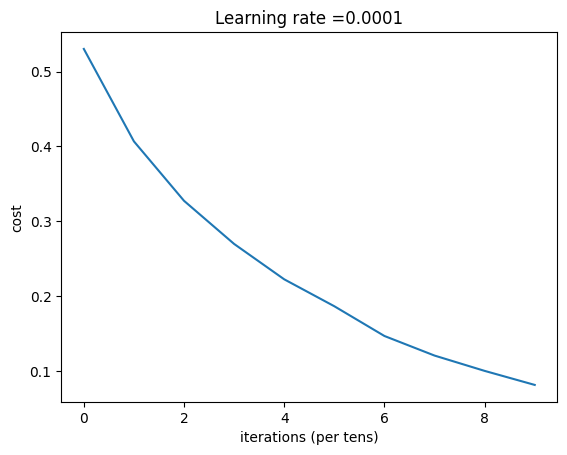



Accuracy on training set is 0.9883900880813599

Accuracy on test set is 0.9752704501152039


In [ ]:
epochs= 10
evaluate_this_model(modelcnn, epochs)

## Check The Confusion Matrix for the CNN

21/21 [==============================] - 0s 5ms/step
[[0.00426454 0.02247435 0.9779328 ]
 [0.01146035 0.00917657 0.99273646]
 [0.7524569  0.07124727 0.01407226]
 ...
 [0.03331791 0.00554673 0.9820402 ]
 [0.0036301  0.02694507 0.9708943 ]
 [0.01033985 0.01576431 0.9839516 ]]
[2 2 0 2 2 2 0 1 0 2 1 2 1 1 0 2 0 1 1 1 2 2 1 0 2 2 0 2 2 2 0 0 2 2 2 2 2
 0 2 2 2 2 0 2 0 1 2 2 0 1 2 1 2 1 2 1 0 2 2 2 1 1 2 0 2 1 2 2 1 2 0 0 1 1
 1 1 0 0 1 2 0 1 2 2 1 1 0 2 0 1 1 0 0 2 0 2 0 0 2 1 2 2 0 2 1 0 0 1 2 2 1
 2 1 1 2 0 2 2 1 1 2 2 0 2 1 2 1 2 2 1 1 2 2 0 0 1 1 2 1 2 1 2 2 1 2 1 1 1
 2 1 2 0 2 1 1 0 2 1 2 1 0 1 2 1 2 2 1 2 2 1 1 1 2 1 2 2 1 2 0 2 0 2 0 0 1
 2 0 1 2 2 2 0 1 0 1 0 2 1 2 2 2 2 1 0 1 2 0 2 1 2 2 2 0 2 0 0 2 1 2 2 2 2
 1 2 1 2 1 1 0 1 1 2 1 2 0 1 1 1 2 1 2 2 2 1 1 0 0 1 1 2 2 0 2 1 2 2 2 0 1
 2 1 2 2 2 2 2 1 2 0 2 1 1 2 2 2 2 1 2 0 2 2 1 0 1 2 2 1 2 0 1 0 2 1 2 2 2
 2 2 2 0 1 2 2 1 0 2 2 0 0 2 0 2 0 1 0 1 0 0 1 2 2 1 0 1 1 0 2 0 1 0 0 1 1
 2 1 2 0 0 1 1 0 1 0 2 2 1 1 2 1 1 2 1 1 1 2 1 1 1

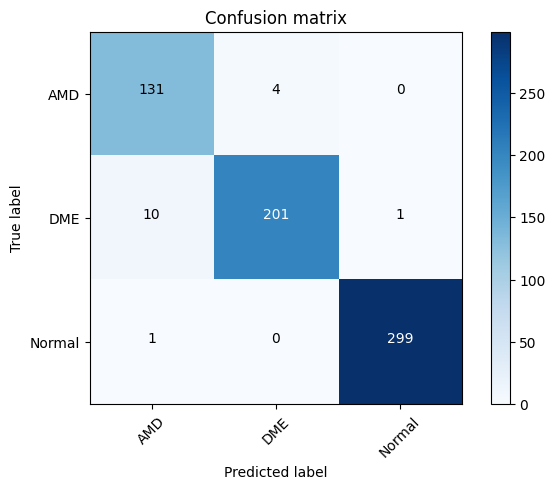

In [ ]:
# @title
# Predict model on Test Data

Y_pred = modelcnn.predict(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred =  np.argmax(Y_pred, axis=1)
print(y_pred)

target_names = ['AMD', 'DME', 'Normal']

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

## Check The Classification report for the CNN

In [ ]:
from sklearn.metrics import classification_report
#reversing one hot encoding
a = np.array(y_test)
import pandas as pd
df= pd.DataFrame({"0":a[:,0],"1":a[:,1],"2":a[:,2]})
#print(df)
#print(a)
df['tags']=''
for col_name in df.columns:
    df.loc[df[col_name]==1,'tags']= df['tags']+' '+col_name


df['tags'] = df['tags'].astype(int)
#print(df['tags'].dtype)
#print(y_pred.dtype)
print(classification_report(df['tags'], y_pred, target_names=target_names))

              precision    recall  f1-score   support

         AMD       0.92      0.97      0.95       135
         DME       0.98      0.95      0.96       212
      Normal       1.00      1.00      1.00       300

    accuracy                           0.98       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.98      0.98      0.98       647



# Solve using Transfer Learning


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
#from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# load pre-trained VGG16 model

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

In [ ]:
vgg16_model.input

<KerasTensor: shape=(None, 128, 128, 3) dtype=float32 (created by layer 'input_2')>

### Freezing Layers

In [ ]:
# freeze all layers in the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

### adding our own top layers

In [ ]:
# add our own top layers
x = vgg16_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [ ]:
vgg16_model.output

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
# create a new model by combining pre-trained VGG16 with your own top layers
model_VGG16 = Model(inputs=vgg16_model.input, outputs=predictions)

In [ ]:
model_VGG16.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_VGG16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

### converting 1-channel to 3-channel as VGG16 take 3-channel input

Training :

In [ ]:
X_traing2rgb = []
#len(X_train)
for i in range(len(X_train)):
  #print(i)
  X_traing2rgb.append(cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2RGB))


In [ ]:
len(X_traing2rgb), type(X_traing2rgb)

(2584, list)

In [ ]:
X_traing2rgbnp = np.asarray(X_traing2rgb)

In [ ]:
X_traing2rgbnp.shape

(2584, 128, 128, 3)

In [ ]:
y_train.shape

(2584, 3)

Testing :

In [ ]:
X_testg2rgb = []
#len(X_train)
for i in range(len(X_test)):
  #print(i)
  X_testg2rgb.append(cv2.cvtColor(X_test[i],cv2.COLOR_GRAY2RGB))


In [ ]:
len(X_testg2rgb), type(X_testg2rgb)

(647, list)

In [ ]:
X_testg2rgbnp = np.asarray(X_testg2rgb)

In [ ]:
X_testg2rgbnp.shape

(647, 128, 128, 3)

In [ ]:
y_test.shape

(647, 3)

Training VGG16 Model

In [ ]:
#trained_VGG16 = model_VGG16.fit(X_traing2rgbnp, y_train, batch_size=32, epochs=20, validation_split=0.2)
trained_VGG16 = model_VGG16.fit(X_traing2rgbnp, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
65/65 [==============================] - 6s 76ms/step - loss: 0.9887 - accuracy: 0.5123 - val_loss: 0.8492 - val_accuracy: 0.6402
Epoch 2/20
65/65 [==============================] - 4s 65ms/step - loss: 0.8229 - accuracy: 0.6589 - val_loss: 0.7502 - val_accuracy: 0.7041
Epoch 3/20
65/65 [==============================] - 4s 65ms/step - loss: 0.7470 - accuracy: 0.7049 - val_loss: 0.6829 - val_accuracy: 0.7563
Epoch 4/20
65/65 [==============================] - 4s 66ms/step - loss: 0.6901 - accuracy: 0.7397 - val_loss: 0.6746 - val_accuracy: 0.7215
Epoch 5/20
65/65 [==============================] - 4s 67ms/step - loss: 0.6435 - accuracy: 0.7615 - val_loss: 0.5943 - val_accuracy: 0.7524
Epoch 6/20
65/65 [==============================] - 4s 66ms/step - loss: 0.6061 - accuracy: 0.7808 - val_loss: 0.5557 - val_accuracy: 0.8124
Epoch 7/20
65/65 [==============================] - 4s 66ms/step - loss: 0.5785 - accuracy: 0.7954 - val_loss: 0.5403 - val_accuracy: 0.8104
Epoch 8/20
65

In [ ]:
model_VGG16.save('/content/drive/MyDrive/DICE_AI_Live_02/Assignment/VGG16_TransferLearning.h5')

In [ ]:
#model_VGG16 = load_model('/content/drive/MyDrive/VGG16_TransferLearning.h5')

## Check The Confusion Matrix for the Transfer Learning

21/21 [==============================] - 2s 91ms/step
[[0.011 0.119 0.87 ]
 [0.067 0.414 0.519]
 [0.6   0.169 0.231]
 ...
 [0.075 0.129 0.796]
 [0.014 0.186 0.8  ]
 [0.037 0.347 0.616]]
[2 2 0 2 2 2 0 1 0 2 1 2 0 1 0 2 0 1 1 1 2 2 1 0 2 2 0 2 2 2 0 0 2 2 2 2 2
 0 2 2 2 2 1 2 0 1 2 2 0 1 2 1 2 1 2 1 0 2 2 2 1 1 2 0 2 1 2 2 1 2 1 0 1 1
 0 1 0 0 2 2 0 1 2 2 1 0 0 2 0 1 1 1 0 2 1 2 0 1 2 1 2 2 0 0 0 0 0 0 2 2 1
 0 2 1 2 0 2 1 1 2 2 2 0 2 1 2 1 2 2 1 1 2 2 0 0 1 1 2 1 2 1 2 2 1 2 2 1 0
 2 1 2 1 2 1 1 0 2 1 2 1 0 1 2 1 2 2 1 2 2 1 1 1 2 1 2 2 1 2 1 2 0 2 0 0 1
 2 0 1 2 2 2 1 1 0 0 0 2 1 2 2 2 0 1 0 1 2 0 2 1 1 2 2 0 2 2 1 2 0 2 2 2 2
 1 2 1 2 1 0 0 1 2 2 1 2 0 1 1 1 2 1 2 2 2 1 1 0 0 1 1 2 2 0 2 0 2 2 2 0 1
 2 1 2 2 2 2 2 1 2 0 2 1 1 2 1 2 2 1 2 0 2 2 1 0 1 2 1 1 2 0 1 1 2 1 2 2 2
 2 2 2 0 1 2 2 1 0 2 2 0 0 2 0 2 0 1 0 1 0 0 1 2 2 1 0 1 1 0 2 0 1 0 1 1 1
 2 1 2 0 0 2 1 0 0 1 2 2 1 1 2 1 2 2 1 1 1 2 1 1 1 0 2 2 1 2 0 1 1 2 1 2 2
 2 2 0 1 2 0 0 0 1 0 2 1 1 0 2 2 0 2 1 0 1 2 1 2 2 1 2 1 2 0 2 2

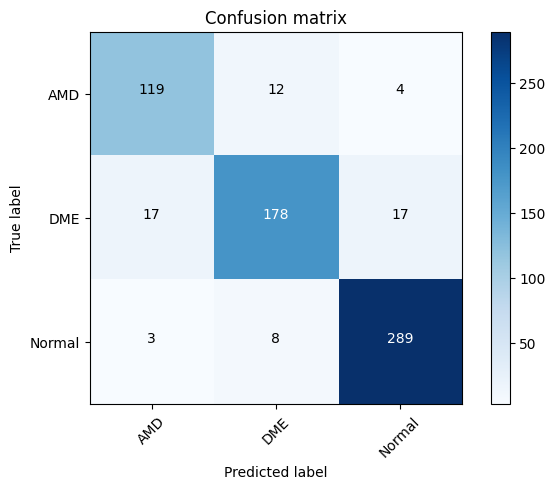

In [ ]:
# @title
# Predict model on Test Data

Y_pred = model_VGG16.predict(X_testg2rgbnp)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred =  np.argmax(Y_pred, axis=1)
print(y_pred)

target_names = ['AMD', 'DME', 'Normal']

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

## Check The Classification Report for the Transfer Learning

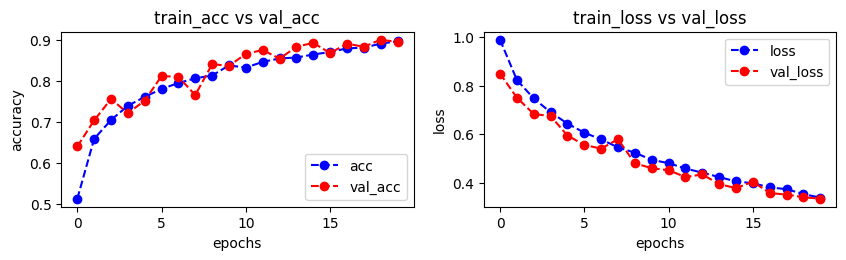

In [ ]:
fig = plt.figure(figsize=(10,5))

# Plot accuracy
plt.subplot(221)
plt.plot(trained_VGG16.history['accuracy'],'bo--', label = "acc")
plt.plot(trained_VGG16.history['val_accuracy'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(trained_VGG16.history['loss'],'bo--', label = "loss")
plt.plot(trained_VGG16.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

In [ ]:
loss_VGG16, acc_VGG16 = model_VGG16.evaluate(X_testg2rgbnp, y_test, verbose=2)
print(f'Test accuracy: {acc_VGG16:.4f}')

21/21 - 1s - loss: 0.3561 - accuracy: 0.9057 - 1s/epoch - 53ms/step
Test accuracy: 0.9057


### Report the best Solution and Explain in below cell in a comment and justify your choice.


*   CNN Test Accuracy: 0.9753
*   VGG16 transfer Learning Test Accurancy: 0.9057
*   CNN Test Accuracy: 0.8934


For choosing for the best solution, there are some consideration that must be taken into account.

 The above list sorts the model with respect to best to least accuracy. However
 if computing resoureces are considered, VGG16 model is most computationally extensive followed by CNN model.

 Furthermore, demand of level of accuracy is another concern.
  
Conclusion:

if Demand for high accuracy, and computational resources are low, CNN is best option,

on the other hand,  if Demand for high accuracy, and computational resources are available, VGG16 model will be used.
